In [1]:
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("paperboy_instance.xlsx")
df.head()

,name,x,y
0,start,375,375
1,1,17,310
2,2,39,85
3,3,48,403
4,4,49,444


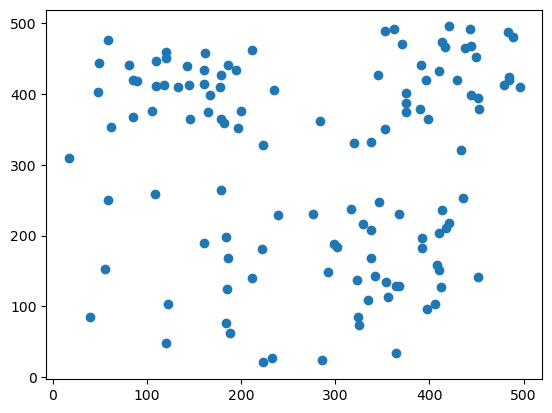

In [3]:
plt.scatter(df["x"], df["y"])

In [4]:
df_rb = df[(df["y"] > 300) & (df["x"] > 225)] #-> aangepast naar 300 ipv 250
df_ro = df[(df["y"] < 300) & (df["x"] > 250)]
df_lb = df[(df["y"] > 300) & (df["x"] < 225)]
df_lo = df[(df["y"] < 300) & (df["x"] < 250)]

row = df.iloc[[0]]
print(row)
df_ro = pd.concat([row, df_ro])
df_lo = pd.concat([row, df_lo])
df_lb = pd.concat([row, df_lb])

print(len(df_rb), len (df_ro), len(df_lb), len(df_lo))

    name    x    y
0  start  375  375
35 35 35 19


In [5]:
df_rb = df_rb.reset_index(drop=True)
df_ro = df_ro.reset_index(drop=True)
df_lb = df_lb.reset_index(drop=True)
df_lo = df_lo.reset_index(drop=True)

In [6]:
def distance(dataframe): 
    dist = {}
    j = 0
    k = 1
    n = len(dataframe)
    while j < n-1:
        d = abs(dataframe.loc[j,"x"] - dataframe.loc[k,"x"]) + abs(dataframe.loc[j,"y"] - dataframe.loc[k,"y"])
        #d = m.sqrt((df.loc[j, "x"] - df.loc[k, "x"])**2 + (df.loc[j, "y"] - df.loc[k, "y"])**2)
        dist[(j, k)] = d
        dist[(k,j)] = d
        k = k + 1
        if k == n:
            j = j + 1
            #print (j)
            k = j + 1
    #print (dist)
    return dist

#distance(df_ro)

### defining function 1: nn

In [14]:
def nearest_neighbor(dataframe):
    dist = distance(dataframe)
    #distance(dataframe)
    totaal = 0
    kortste = 1000 
    naar_stad = 0 
    i = 0
    j = [0]
    n = len(dataframe)
    while i < n-1:
        for k in range(n):
            if k not in j:
                afstand = dist[(k,j[i])]
                #print (afstand, j[i], k)
                if afstand < kortste:
                    kortste = afstand
                    naar_stad = k
        if naar_stad == None:
            naar_stad = j[0]
            #print(j[34])
            kortste = dist[(j[n-1],j[0])]
            print(kortste)
        j.append(naar_stad)
        #print(f'vanaf punt {j[i]} is punt {j[i+1]} het dichtste bij')
        totaal = totaal + kortste
        #print (f'de totale afstand is {totaal}, en de afstand van het vorige punt naar dit punt is {kortste}')
        i = i + 1
        kortste = 1000
        k = 0
        naar_stad = None
    print (j)
    print(f'de totale afstand is {totaal}')
    return j
nearest_neighbor(df_ro)

[0, 21, 15, 6, 10, 13, 12, 14, 16, 18, 20, 17, 11, 8, 9, 7, 3, 5, 4, 1, 30, 32, 31, 28, 23, 22, 26, 27, 29, 25, 24, 19, 2, 34, 33]
de totale afstand is 1663


[0,
 21,
 15,
 6,
 10,
 13,
 12,
 14,
 16,
 18,
 20,
 17,
 11,
 8,
 9,
 7,
 3,
 5,
 4,
 1,
 30,
 32,
 31,
 28,
 23,
 22,
 26,
 27,
 29,
 25,
 24,
 19,
 2,
 34,
 33]

### rb

In [15]:
nearest_neighbor(df_rb)

[0, 10, 11, 12, 15, 14, 13, 16, 20, 24, 27, 28, 29, 32, 31, 34, 33, 30, 23, 25, 22, 18, 17, 19, 8, 7, 9, 5, 6, 4, 3, 2, 1, 26, 21]
de totale afstand is 1513


[0,
 10,
 11,
 12,
 15,
 14,
 13,
 16,
 20,
 24,
 27,
 28,
 29,
 32,
 31,
 34,
 33,
 30,
 23,
 25,
 22,
 18,
 17,
 19,
 8,
 7,
 9,
 5,
 6,
 4,
 3,
 2,
 1,
 26,
 21]

### ro

In [16]:
nearest_neighbor(df_ro)

[0, 21, 15, 6, 10, 13, 12, 14, 16, 18, 20, 17, 11, 8, 9, 7, 3, 5, 4, 1, 30, 32, 31, 28, 23, 22, 26, 27, 29, 25, 24, 19, 2, 34, 33]
de totale afstand is 1663


[0,
 21,
 15,
 6,
 10,
 13,
 12,
 14,
 16,
 18,
 20,
 17,
 11,
 8,
 9,
 7,
 3,
 5,
 4,
 1,
 30,
 32,
 31,
 28,
 23,
 22,
 26,
 27,
 29,
 25,
 24,
 19,
 2,
 34,
 33]

### lb

In [17]:
nearest_neighbor(df_lb)

[0, 32, 31, 28, 26, 23, 24, 20, 18, 16, 13, 11, 9, 8, 6, 3, 2, 5, 7, 10, 19, 25, 27, 29, 30, 21, 17, 14, 15, 12, 22, 33, 34, 1, 4]
de totale afstand is 1631


[0,
 32,
 31,
 28,
 26,
 23,
 24,
 20,
 18,
 16,
 13,
 11,
 9,
 8,
 6,
 3,
 2,
 5,
 7,
 10,
 19,
 25,
 27,
 29,
 30,
 21,
 17,
 14,
 15,
 12,
 22,
 33,
 34,
 1,
 4]

### lo

In [18]:
nearest_neighbor(df_lo)

[0, 18, 15, 12, 10, 7, 11, 14, 9, 13, 16, 17, 5, 6, 1, 2, 3, 4, 8]
de totale afstand is 1406


[0, 18, 15, 12, 10, 7, 11, 14, 9, 13, 16, 17, 5, 6, 1, 2, 3, 4, 8]

### plotten

[0, 10, 11, 12, 15, 14, 13, 16, 20, 24, 27, 28, 29, 32, 31, 34, 33, 30, 23, 25, 22, 18, 17, 19, 8, 7, 9, 5, 6, 4, 3, 2, 1, 26, 21]
de totale afstand is 1513


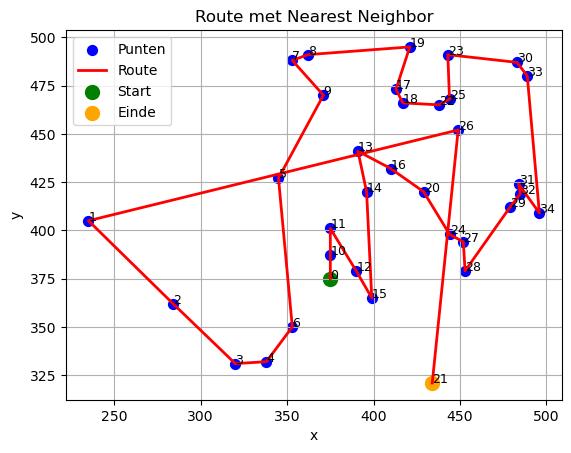

In [20]:
import matplotlib.pyplot as plt

def plot_route(dataframe):
    route = nearest_neighbor(dataframe)
    x = dataframe["x"]
    y = dataframe["y"]

    # Plot alle punten
    plt.scatter(x, y, c="blue", s=50, label="Punten")

    # Labels bij punten
    for idx, (xi, yi) in enumerate(zip(x, y)):
        plt.text(xi+0.1, yi+0.1, str(idx), fontsize=9)

    # Route tekenen
    route_x = [dataframe.loc[i, "x"] for i in route]
    route_y = [dataframe.loc[i, "y"] for i in route]

    plt.plot(route_x, route_y, c="red", linewidth=2, label="Route")
    plt.scatter(route_x[0], route_y[0], c="green", s=100, label="Start")
    plt.scatter(route_x[-1], route_y[-1], c="orange", s=100, label="Einde")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Route met Nearest Neighbor")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_route(df_rb)
#[0, 10, 11, 12, 15, 14, 13, 16, 20, 24, 27, 21, 28, 29, 32, 31, 34, 33, 30, 23, 25, 26, 22, 18, 17, 19, 8, 7, 9, 5, 1, 2, 3, 4, 6]

[0, 21, 15, 6, 10, 13, 12, 14, 16, 18, 20, 17, 11, 8, 9, 7, 3, 5, 4, 1, 30, 32, 31, 28, 23, 22, 26, 27, 29, 25, 24, 19, 2, 34, 33]
de totale afstand is 1663


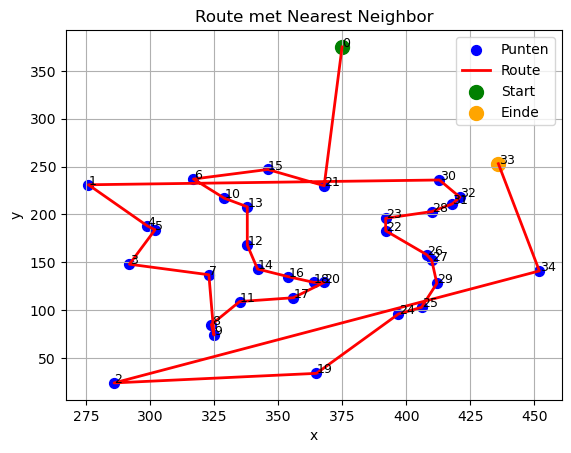

In [21]:
plot_route(df_ro)

[0, 32, 31, 28, 26, 23, 24, 20, 18, 16, 13, 11, 9, 8, 6, 3, 2, 5, 7, 10, 19, 25, 27, 29, 30, 21, 17, 14, 15, 12, 22, 33, 34, 1, 4]
de totale afstand is 1631


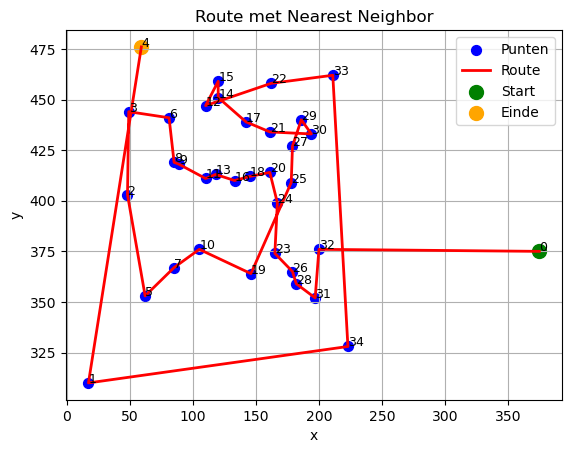

In [24]:
plot_route(df_lb)
#[0, 34, 31, 28, 26, 23, 19, 10, 7, 5, 1, 2, 3, 4, 6, 8, 9, 11, 12, 16, 18, 20, 24, 25, 27, 30, 29, 21, 17, 12, 14, 15, 22, 33]

[0, 18, 15, 12, 10, 7, 11, 14, 9, 13, 16, 17, 5, 6, 1, 2, 3, 4, 8]
de totale afstand is 1406


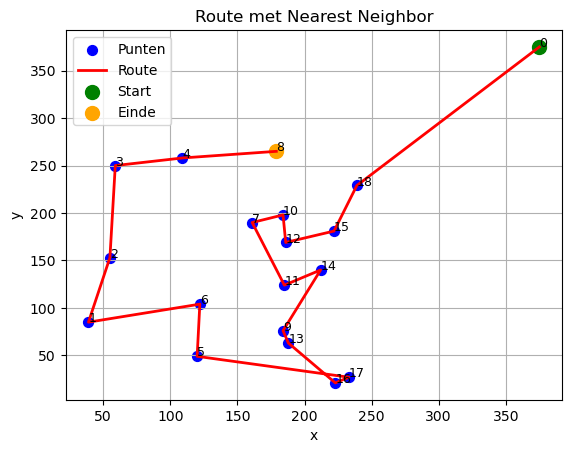

In [26]:
plot_route(df_lo)

### functie route lengte

In [27]:
def route_lengte(dataframe, lijst):
    dist = distance(dataframe)
    n = len(dataframe)
    print(n)
    totale_afstand = 0
    for i in range (n-1):
        afstand = dist[(lijst[i],lijst[i+1])]
        totale_afstand += afstand
    print (totale_afstand)
    return

In [28]:
L = [0, 18, 15, 12, 10, 7, 11, 14, 9, 13, 17, 16, 5, 6, 1, 2, 3, 4, 8]
route_lengte(df_lo, L)
#L = [0, 9, 10, 11, 14, 13, 12, 15, 19, 23, 26, 27, 28, 31, 30, 33, 32, 29, 22, 24, 25, 21, 17, 16, 18, 7, 6, 8, 4, 5, 1, 2, 3, 20]
#L = [0, 12, 13, 16, 15, 18, 22, 26, 29, 30, 31, 34, 33, 36, 35, 32, 25, 27, 28, 24, 20, 19, 21, 10, 9, 11, 7, 1, 3, 2, 4, 5, 6, 8, 14, 17, 23] >250>
L = [0, 10, 11, 12, 15, 14, 13, 16, 20, 24, 27, 21, 28, 29, 32, 31, 34, 33, 30, 23, 25, 26, 22, 18, 17, 19, 8, 7, 9, 5, 1, 2, 3, 4, 6]
route_lengte(df_rb, L)
L = [0, 15, 6, 1, 4, 5, 3, 7, 8, 9, 2, 19, 24, 25, 29, 34, 27, 26, 22, 23, 28, 31, 32, 33, 30, 21, 10, 13, 12, 14, 16, 18, 20, 17, 11]
route_lengte(df_ro, L)
#L = [0, 35, 33, 22, 4, 12, 15, 14, 17, 21, 29, 30, 27, 25, 24, 20, 18, 16, 13, 11, 9, 8, 6, 3, 2, 1, 5, 7, 10, 19, 23, 26, 28, 31, 32, 34]
#L = [0, 31, 28, 26, 23, 19, 10, 7, 5, 1, 2, 3, 4, 6, 8, 9, 11, 13, 16, 18, 20, 24, 25, 27, 30, 29, 21, 17, 12, 14, 15, 22] >250>
L = [0, 34, 31, 28, 26, 23, 19, 10, 7, 5, 1, 2, 3, 4, 6, 8, 9, 11, 12, 16, 18, 20, 24, 25, 27, 30, 29, 21, 17, 12, 14, 15, 22, 33]
route_lengte(df_lb, L)

19
1406
35
1341
35
1380
35


IndexError: list index out of range

### plotten met verbeterde routes

KeyError: 36

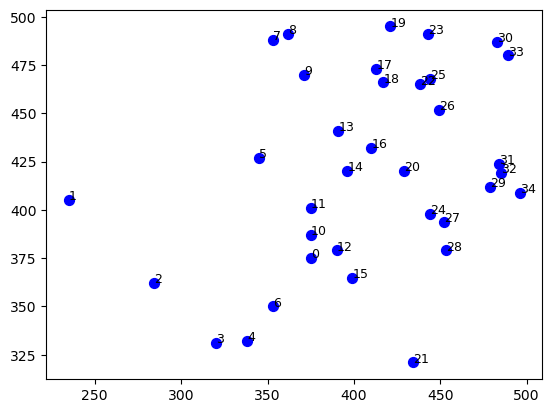

In [29]:
import matplotlib.pyplot as plt

def plot_verbeterde_route(dataframe, route):
    x = dataframe["x"]
    y = dataframe["y"]

    # Plot alle punten
    plt.scatter(x, y, c="blue", s=50, label="Punten")

    # Labels bij punten
    for idx, (xi, yi) in enumerate(zip(x, y)):
        plt.text(xi+0.1, yi+0.1, str(idx), fontsize=9)

    # Route tekenen
    route_x = [dataframe.loc[i, "x"] for i in route]
    route_y = [dataframe.loc[i, "y"] for i in route]

    plt.plot(route_x, route_y, c="red", linewidth=2, label="Route")
    plt.scatter(route_x[0], route_y[0], c="green", s=100, label="Start")
    plt.scatter(route_x[-1], route_y[-1], c="orange", s=100, label="Einde")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Route met Nearest Neighbor")
    plt.legend()
    plt.grid(True)
    plt.show()

#L = [0, 35, 33, 22, 15, 4, 12, 14, 17, 21, 29, 30, 27, 25, 24, 20, 18, 16, 13, 11, 9, 8, 6, 3, 2, 1, 5, 7, 10, 19, 23, 26, 28, 31, 32, 34]
#l = [0, 10, 11, 12, 15, 14, 13, 16, 20, 24, 27, 28, 29, 32, 31, 34, 33, 30, 23, 25, 26, 22, 18, 17, 19, 8, 7, 9, 5, 1, 2, 3, 4, 6, 21]
L = [0, 12, 13, 16, 15, 18, 22, 26, 29, 30, 31, 34, 33, 36, 35, 32, 25, 27, 28, 24, 20, 19, 21, 10, 9, 11, 7, 1, 3, 2, 4, 5, 6, 8,14, 17, 23]
plot_verbeterde_route(df_rb,L)
route_lengte(df_rb, L)

38
1729


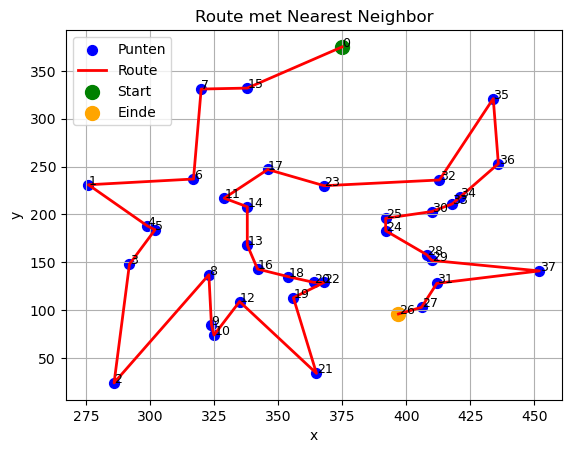

In [141]:
#L = [0, 15, 6, 1, 4, 5, 3, 7, 8, 9, 2, 19, 24, 25, 29, 34, 27, 26, 22, 23, 28, 31, 32, 33, 30, 21, 10, 13, 12, 14, 16, 18, 20, 17, 11]
#L = [ 0, 17, 23, 32, 35, 34, 33, 30, 25, 24, 28, 29, 36, 31, 27, 26, 21, 4, 1, 11, 10, 13, 19, 22, 20, 18, 16, 14, 15, 12, 8, 3, 2, 6, 7, 5, 9]
route_lengte(df_ro, l2)
plot_verbeterde_route(df_ro, l2)

19
1406


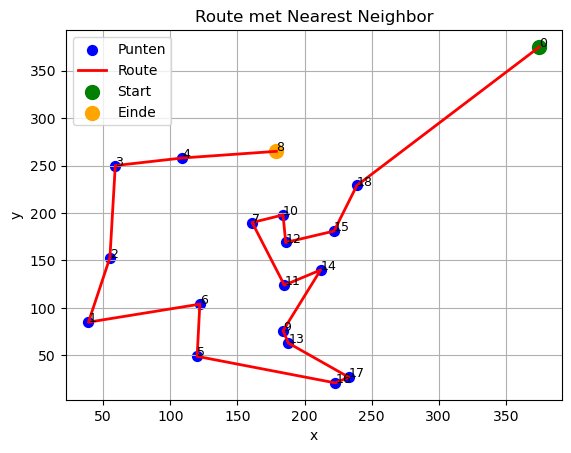

In [70]:
L = [0, 18, 15, 12, 10, 7, 11, 14, 9, 13, 17, 16, 5, 6, 1, 2, 3, 4, 8]
route_lengte(df_lo, L)
plot_verbeterde_route(df_lo, L)

32
1132


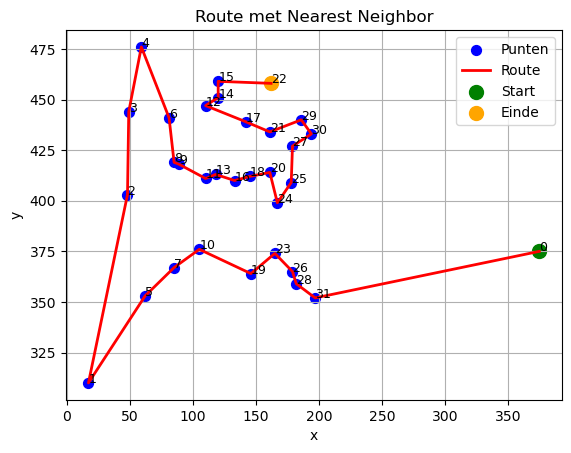

In [202]:
#L = [0, 33, 22, 14, 15, 12, 17, 21, 29, 30, 27, 25, 24, 32, 34, 31, 28, 26, 23, 19, 10, 7, 5, 1, 2, 3, 4, 6, 8, 9, 11, 13, 16, 18, 20]
L = [0, 31, 28, 26, 23, 19, 10, 7, 5, 1, 2, 3, 4, 6, 8, 9, 11, 13, 16, 18, 20, 24, 25, 27, 30, 29, 21, 17, 12, 14, 15, 22]
route_lengte(df_lb, L)
plot_verbeterde_route(df_lb, L)